In [42]:
## Importing necessary libraries and necessary settings 

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
import pandas as pd 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
import seaborn as sns 

In [131]:
#Importing the data 

df = pd.read_csv('loan_data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [132]:
df = df.drop(columns=['Id'])


In [45]:
#Shape of the dataframe
col = df.shape[0]
num = df.shape[1]
print(f"Following dataset has {col} columns and {num} rows")


Following dataset has 252000 columns and 12 rows


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.0,5000694.5,7477502.0,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.0,50.0,65.0,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.0,10.0,15.0,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.0,6.0,9.0,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.0,12.0,13.0,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.0,0.0,0.0,1.0


In [47]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB
None


In [49]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [50]:
#lower case column case 


df.columns = ['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag']

numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"] 

In [51]:
df[numerical].skew()

income               0.005958
age                 -0.005316
experience          -0.012779
current_job_yrs      0.273146
current_house_yrs    0.006786
dtype: float64

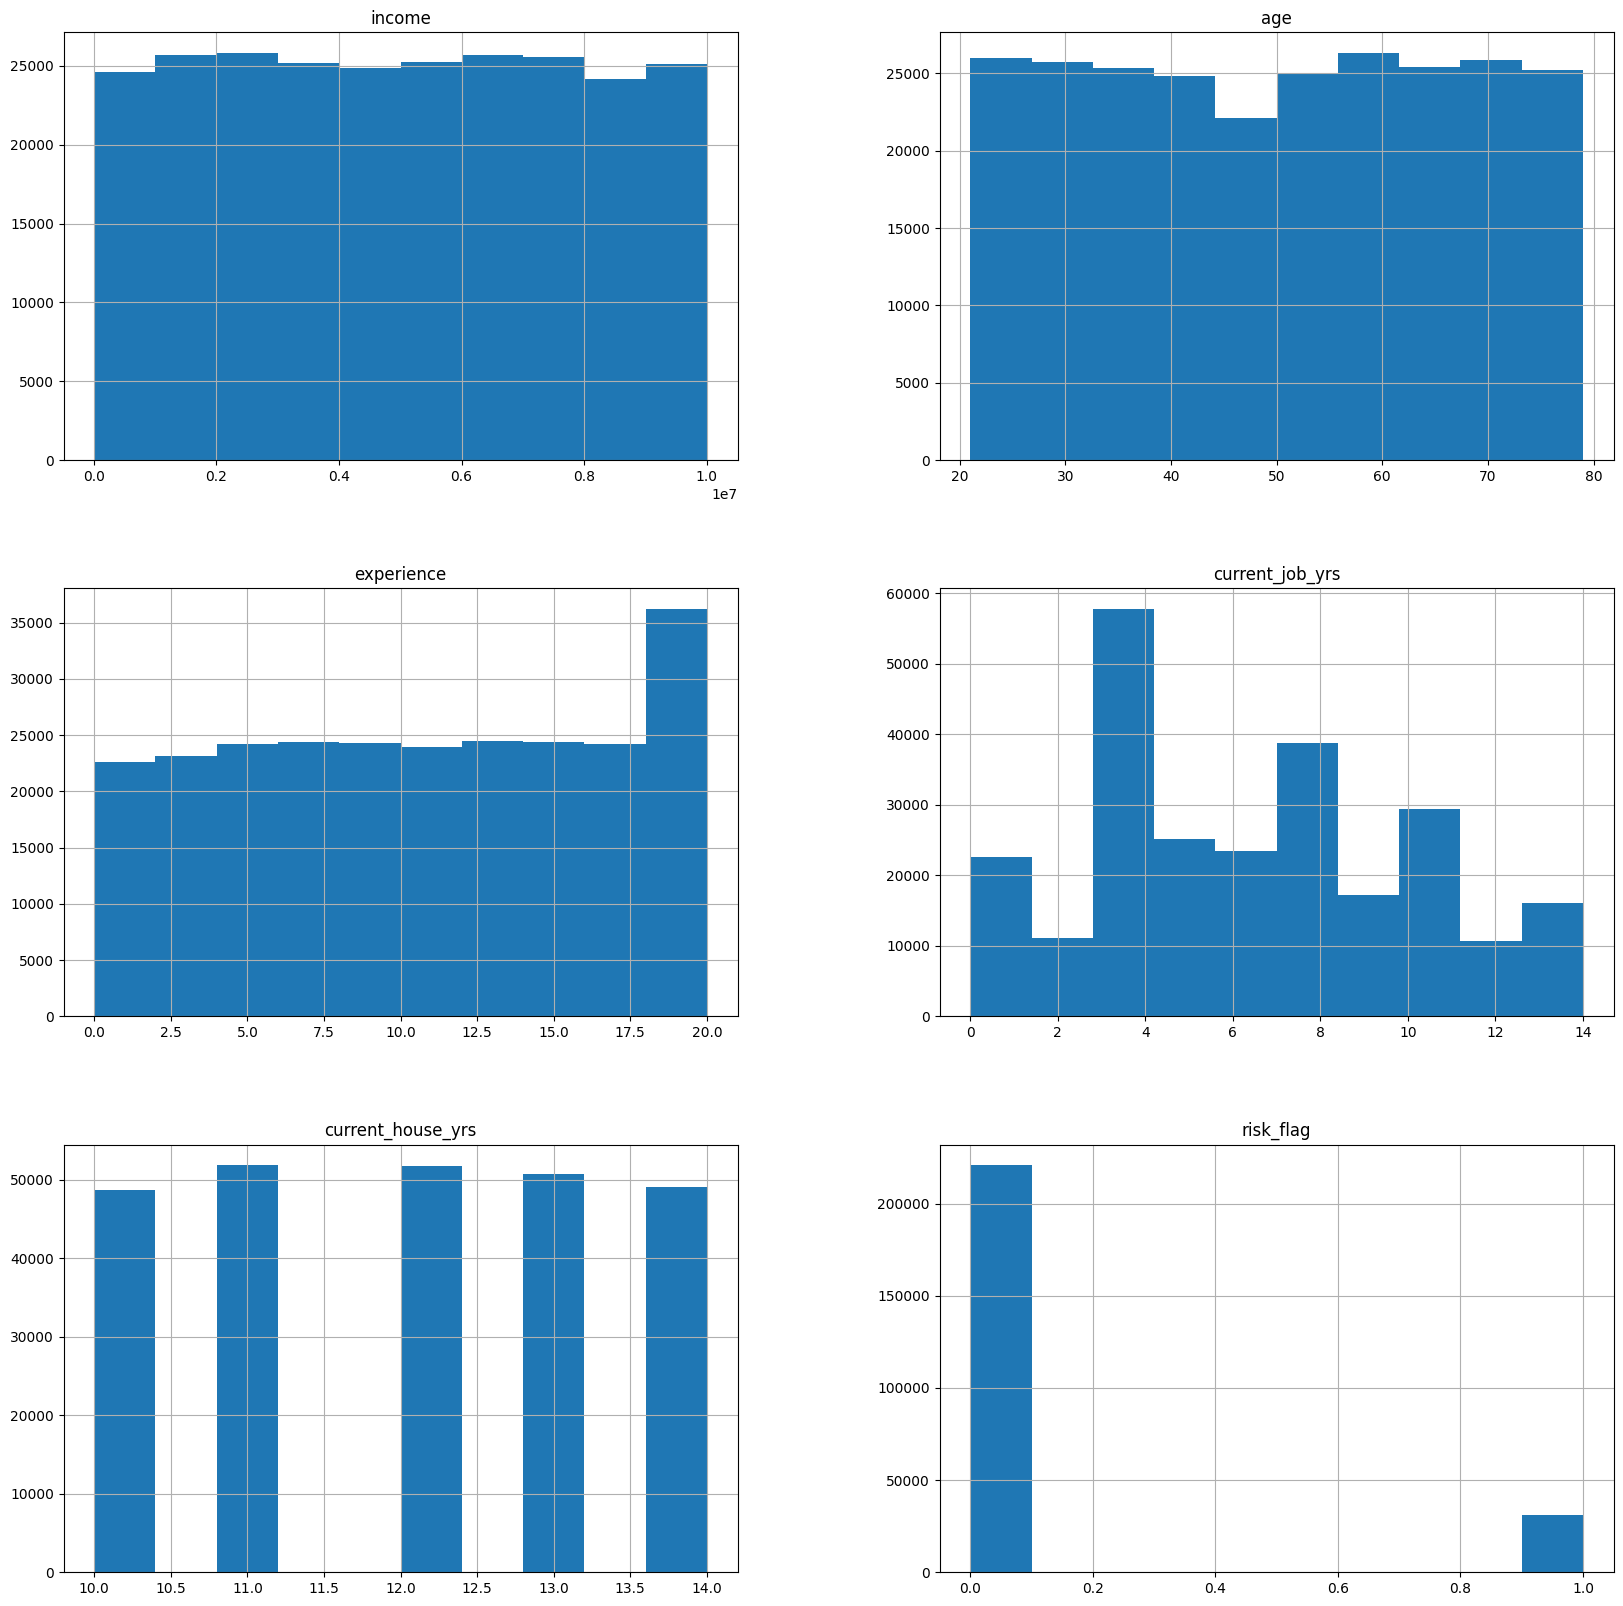

In [52]:
df.hist( figsize = (20, 20))
plt.show()

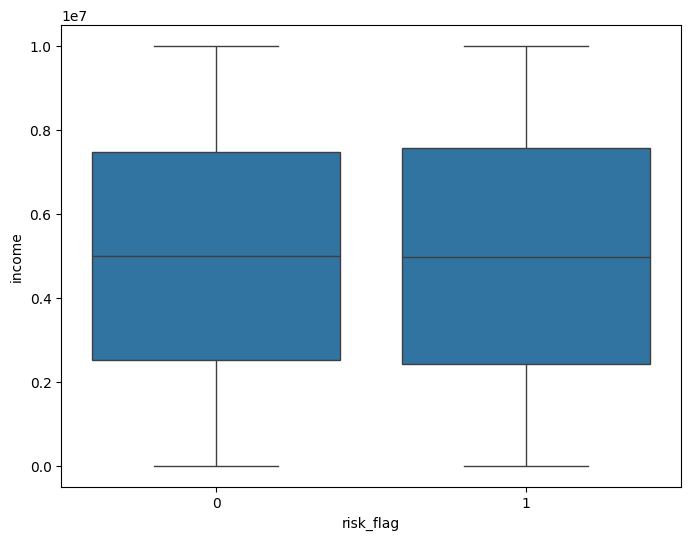

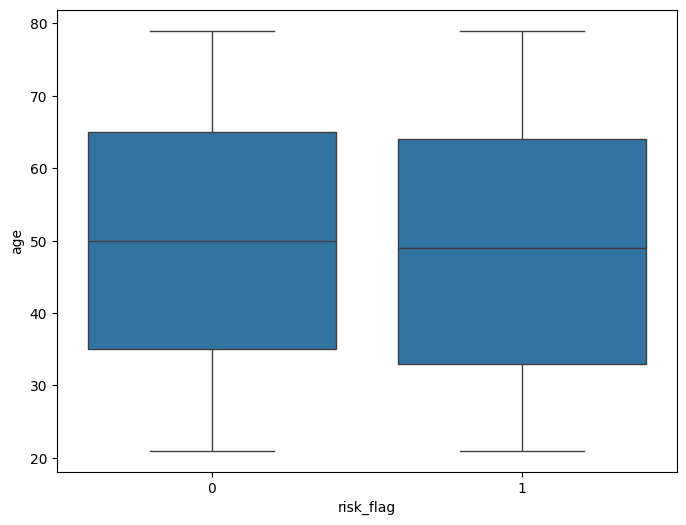

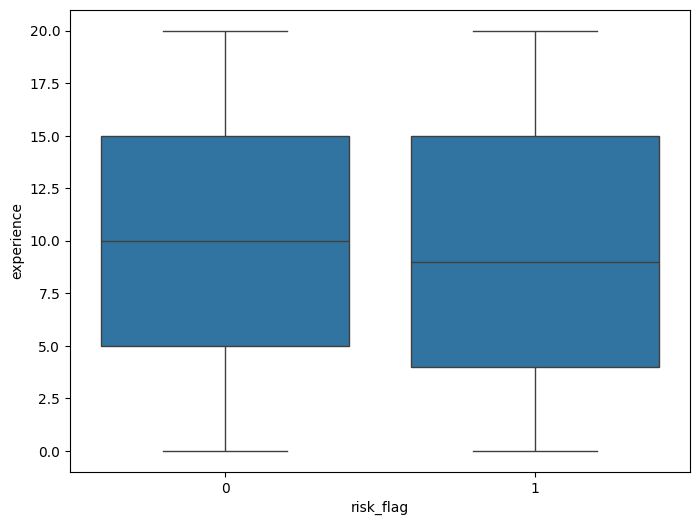

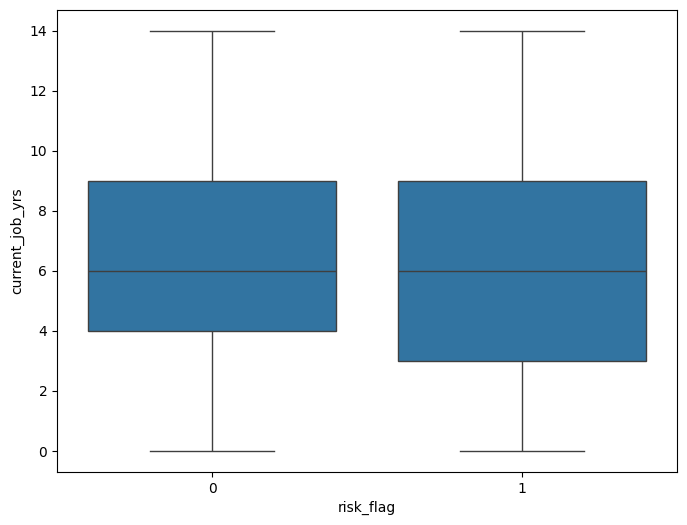

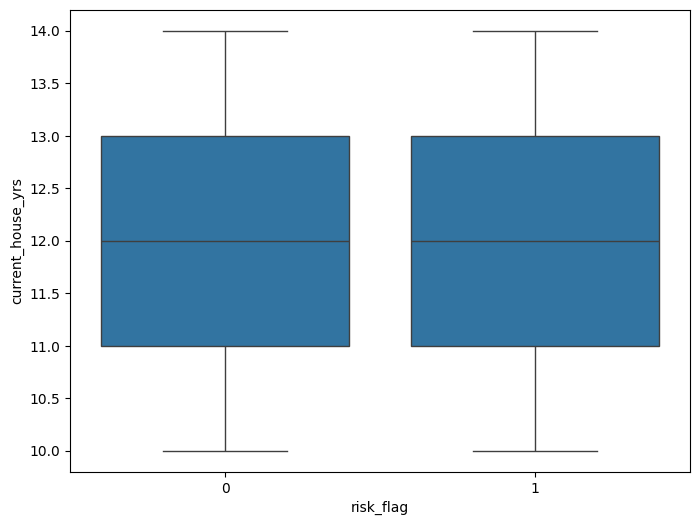

In [53]:
for numerical in ["income","age","experience","current_job_yrs","current_house_yrs"]:
    fig, ax = plt.subplots( figsize = (8,6) )
    sns.boxplot(x = "risk_flag", y = numerical, data = df)

There are no remarkable outliers that needs to be treated

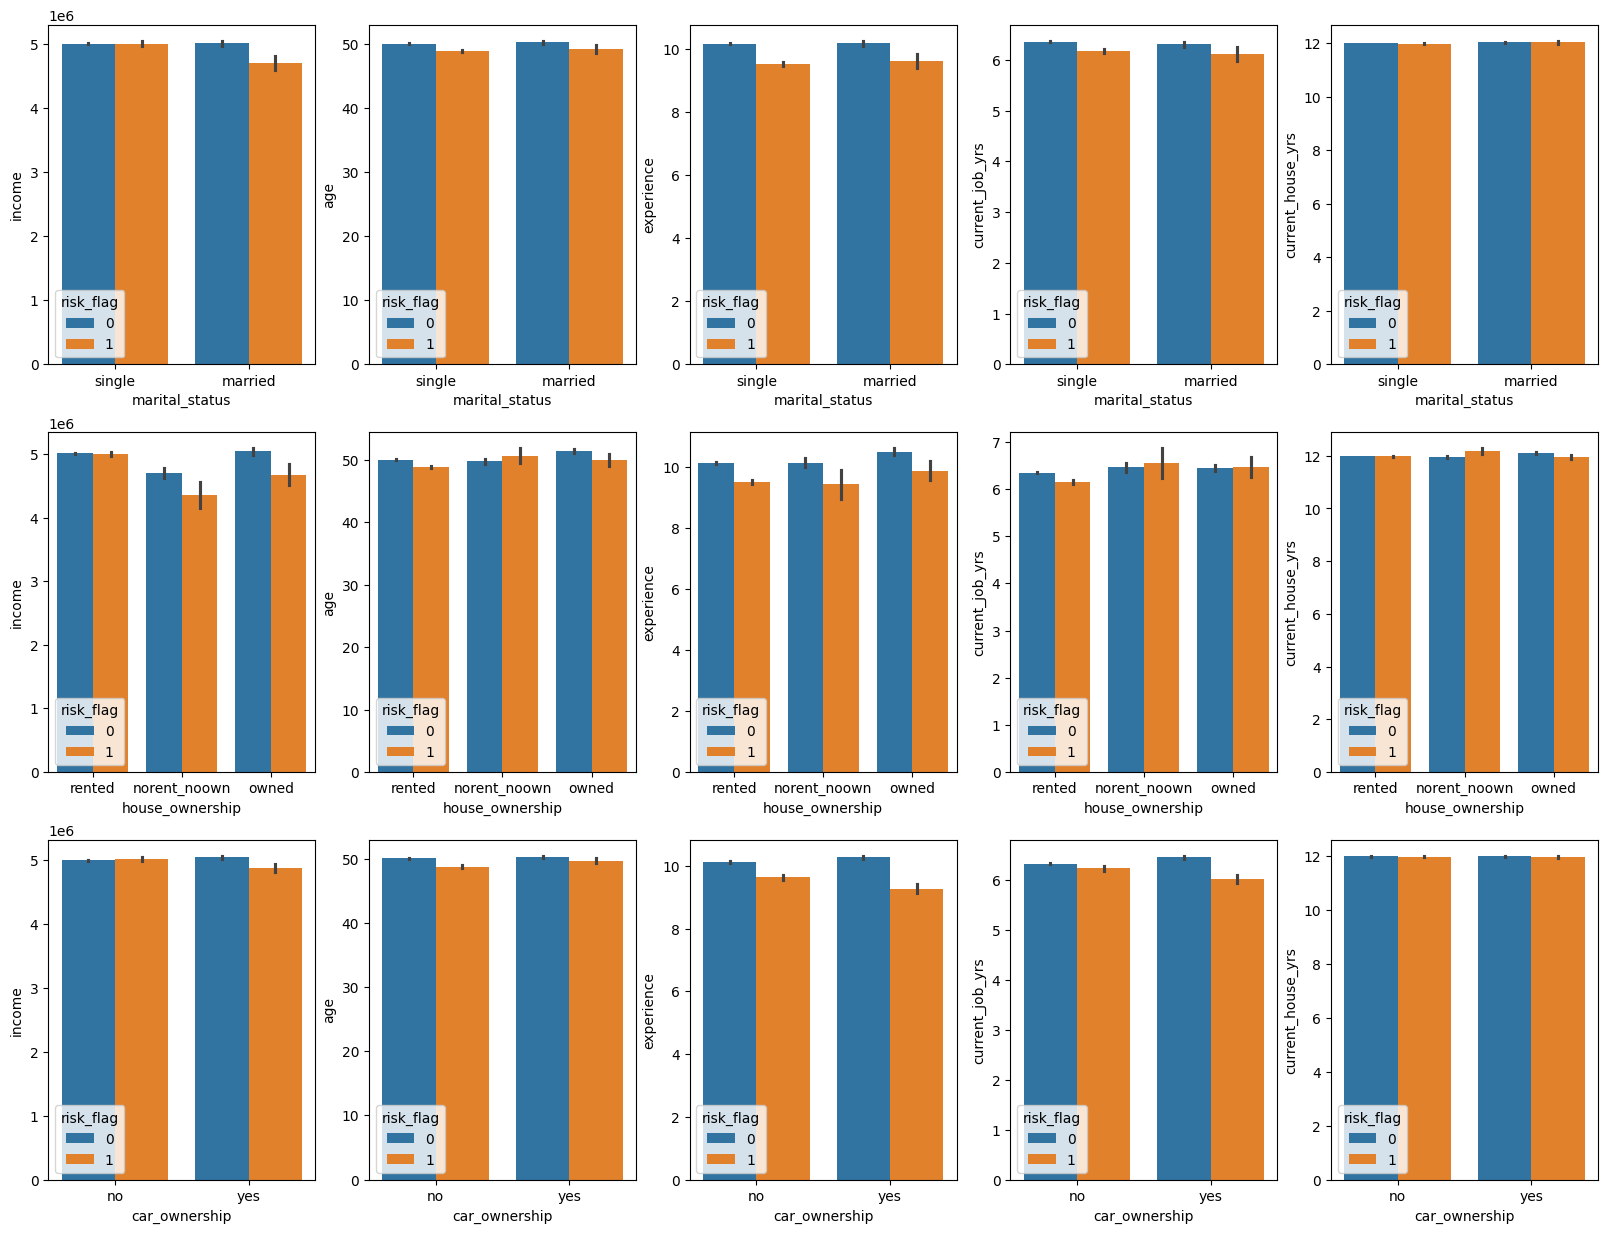

<Figure size 5000x5000 with 0 Axes>

In [54]:
num = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
cat = ["marital_status", "house_ownership", "car_ownership"]

fig, ax = plt.subplots(3, 5, figsize=(20, 15))

plt.figure(figsize=(50, 50))
for c in range( len(cat) ):
    for n in range( len(num) ):
        cat_feature = cat[c]
        num_feature = num[n]
        sns.barplot( x=cat_feature, y=num_feature, hue='risk_flag', data = df, ax=ax[c,n])
    
        
plt.show()

We can see that variables have different scales all together,which interprets that scaling needs to be performed

<Axes: xlabel='house_ownership', ylabel='count'>

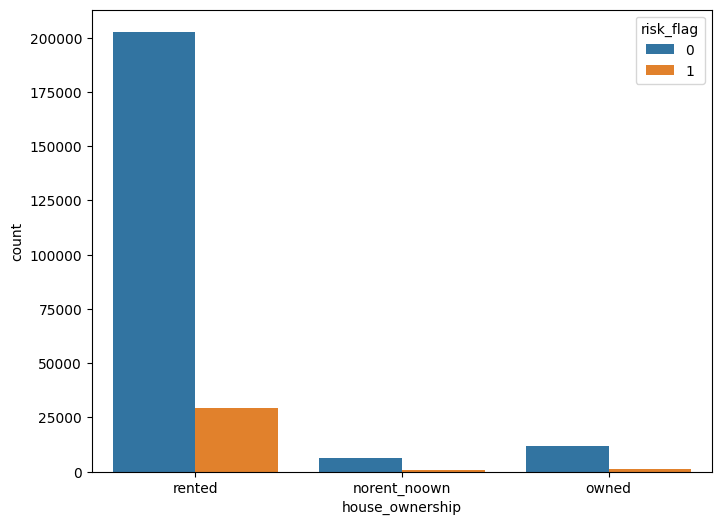

In [55]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='house_ownership', hue='risk_flag', ax=ax, data=df)

We can see that rented house people are more in number which interprets that they are the one who avail loan facility

<Axes: xlabel='car_ownership', ylabel='count'>

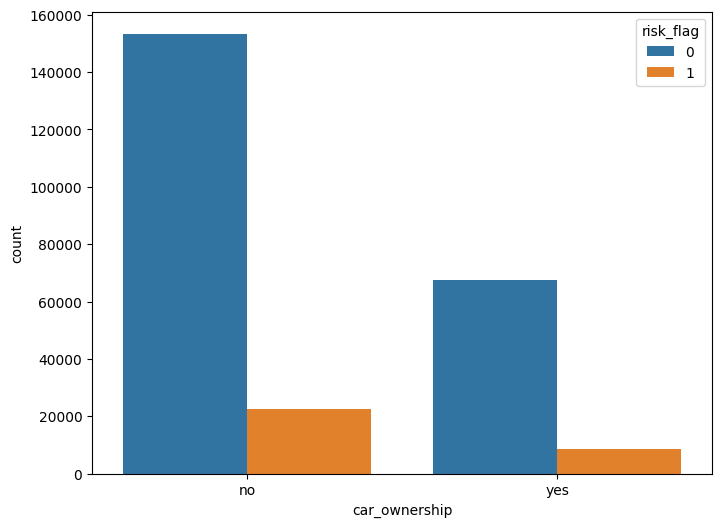

In [56]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='car_ownership', hue='risk_flag', ax=ax, data=df)

People with no car are more likley to be taking more loan and defaulters are more than people with a car 

<Axes: xlabel='marital_status', ylabel='count'>

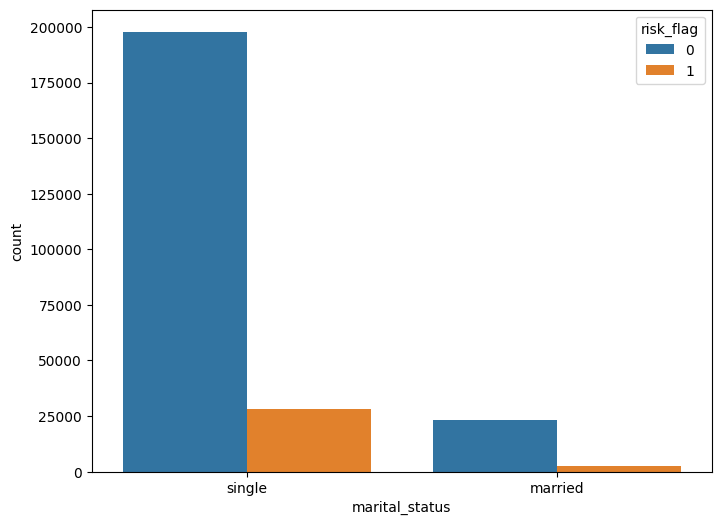

In [57]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='marital_status', hue='risk_flag', data=df )

We see that single people are more likley to avail loans and be potiential loan defaulters 

In [61]:
# Top 10 cities with highest defaulters 
defaulters_count = df[df['risk_flag'] == 0].groupby('city').size().sort_values(ascending=False).head(10)
print(defaulters_count)


city
Vijayanagaram    1110
Saharsa[29]      1067
Bulandshahr      1061
Bhopal           1042
Vijayawada       1025
New_Delhi        1024
Bellary           992
Bareilly          992
Satara            992
Jodhpur           974
dtype: int64


In [62]:
# Top 10 cities with highest non_defaulters

not_defaulters_count = df[df['risk_flag'] == 1].groupby('city').size().sort_values(ascending=False).head(10)
print(not_defaulters_count)

city
Kochi          243
Satna          232
Buxar[37]      228
Srinagar       216
Indore         212
Barasat        206
Mango          200
Bhubaneswar    198
Ghaziabad      196
Sikar          191
dtype: int64


In [63]:
#To check unique values in the categories 

for column in categorical:
    unique_categories = df[column].nunique()
    print( column, ":" + str(unique_categories) )

marital_status :2
house_ownership :3
car_ownership :2
profession :51
city :317
state :29


For the variables 'martial_status' and 'car_ownership' can be binary encoded,
while 'house_ownership' can be one hot encoded and other variables will be target encoded 


<Axes: >

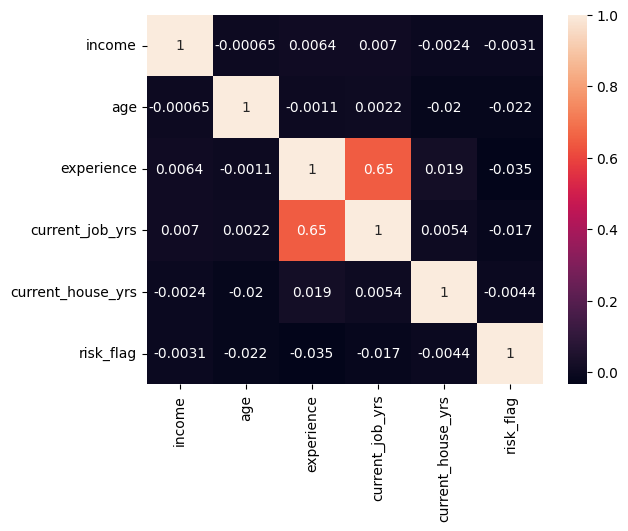

In [65]:
# Heatmap to check the corelation between the numerical variables 
numer = ["income", "age", "experience", "current_job_yrs", "current_house_yrs",'risk_flag']
sns.heatmap(df[numer].corr(),annot=True)

In [66]:
#Splitting the data to proceed further for modelling part


X = df.drop(['risk_flag'], axis=1)
y = df['risk_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Binary encoding the variables martial status and car ownership since there are only 2 different values 

marital_status_dict = {'married': 1, 'single': 0}
car_ownership_dict = {'yes': 1, 'no': 0}

for dataset in [X_train, X_test]:    
    dataset['marital_status'] = dataset['marital_status'].map(marital_status_dict)
    dataset['car_ownership'] = dataset['car_ownership'].map(car_ownership_dict)

In [68]:
#Target encoding the variables as it has large unique values 

from category_encoders import TargetEncoder

cols_to_target_encode = ['profession', 'city', 'state']

for col in cols_to_target_encode:
    encoder = TargetEncoder()
    X_train[col] = encoder.fit_transform(X_train[col], y_train)
    X_test[col] = encoder.transform(X_test[col])

In [69]:
#one hot encoding the variable house ownership 

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_cols = encoder.fit_transform(X_train[['house_ownership']])
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['house_ownership']))
X_train = pd.concat([X_train, encoded_cols_df.set_index(X_train.index)], axis=1)
X_train.drop('house_ownership', axis=1, inplace=True)

encoded_cols = encoder.transform(X_test[['house_ownership']])
encoded_cols_df = pd.DataFrame(encoded_cols, 
                          columns = encoder.get_feature_names_out(['house_ownership']))
X_test = pd.concat([X_test, encoded_cols_df.set_index(X_test.index)], axis=1)
X_test.drop('house_ownership', axis=1, inplace=True)

In [70]:
X_train.head()

,income,age,experience,marital_status,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented
200471,9121364,70,18,0,0,0.120873,0.236842,0.139313,3,11,0.0,0.0,1.0
92611,2636544,39,0,0,0,0.128980,0.078621,0.103837,0,11,0.0,0.0,1.0
86397,1010539,39,9,0,0,0.131487,0.155722,0.128364,4,13,0.0,0.0,1.0
110500,3897430,21,2,0,0,0.129292,0.192362,0.133547,2,12,0.0,0.0,1.0
185133,9470213,41,5,0,1,0.107390,0.114327,0.101142,5,13,1.0,0.0,0.0


In [71]:
#Function to print the score and report of the model 

def print_evaluation(y_test, y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

In [73]:
#Fitting our model with logistic regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy*100

87.59325396825398

In [74]:
#performing scaling to see if we can increase the metrics 


cols_to_scale = ['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']

scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [75]:
#Fitting LR after scaling the data 

model_scaled = LogisticRegression(max_iter = 500000)
model_scaled.fit(X_train, y_train)
y_pred = model_scaled.predict(X_test)
accuracy = model_scaled.score(X_test, y_test)

print(accuracy*100)
print(classification_report(y_test,y_pred))

87.60912698412699

<Axes: xlabel='risk_flag'>

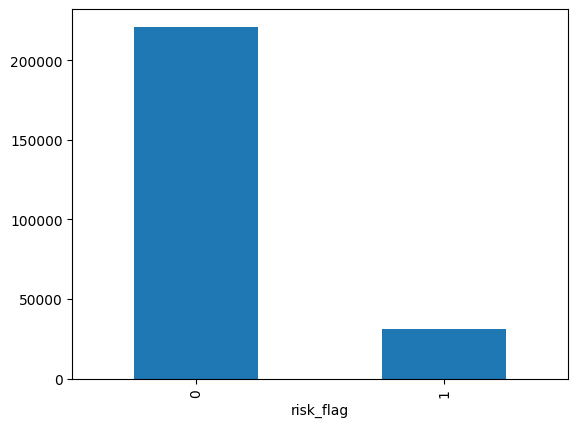

In [97]:
#Checking if the target variable is balanced or not 

df['risk_flag'].value_counts().plot(kind='bar')


In [106]:
#performing oversampling (SMOTE) to balance the data 

sm = SMOTE(random_state = 500)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [107]:
#Fitting LR on the balanced data 

model_scaled_os = LogisticRegression(max_iter = 500000)
model_scaled_os.fit(X_train, y_train)
y_pred = model_scaled_os.predict(X_test)
accuracy = model_scaled_os.score(X_test, y_test)
#print(accuracy*100)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.90      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.89      0.50      0.47     50400
weighted avg       0.88      0.88      0.82     50400



In [120]:
#Fitting KNN on balanced data 

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy*100)
print(classification_report(y_test,y_pred))

85.94246031746032
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44147
           1       0.45      0.57      0.50      6253

    accuracy                           0.86     50400
   macro avg       0.69      0.73      0.71     50400
weighted avg       0.88      0.86      0.87     50400



In [110]:
#Fitting GradientBoostingClassifier 

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_sm, y_sm)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)
print(classification_report(y_test,y_pred))

0.6308928571428571
              precision    recall  f1-score   support

           0       0.92      0.63      0.75     44147
           1       0.19      0.61      0.29      6253

    accuracy                           0.63     50400
   macro avg       0.56      0.62      0.52     50400
weighted avg       0.83      0.63      0.69     50400



In [111]:
#Fitting Randomforest classifier on the data 

model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train,y_train)

y_pred = model_1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44147
           1       0.60      0.54      0.57      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.74      0.75     50400
weighted avg       0.89      0.90      0.90     50400



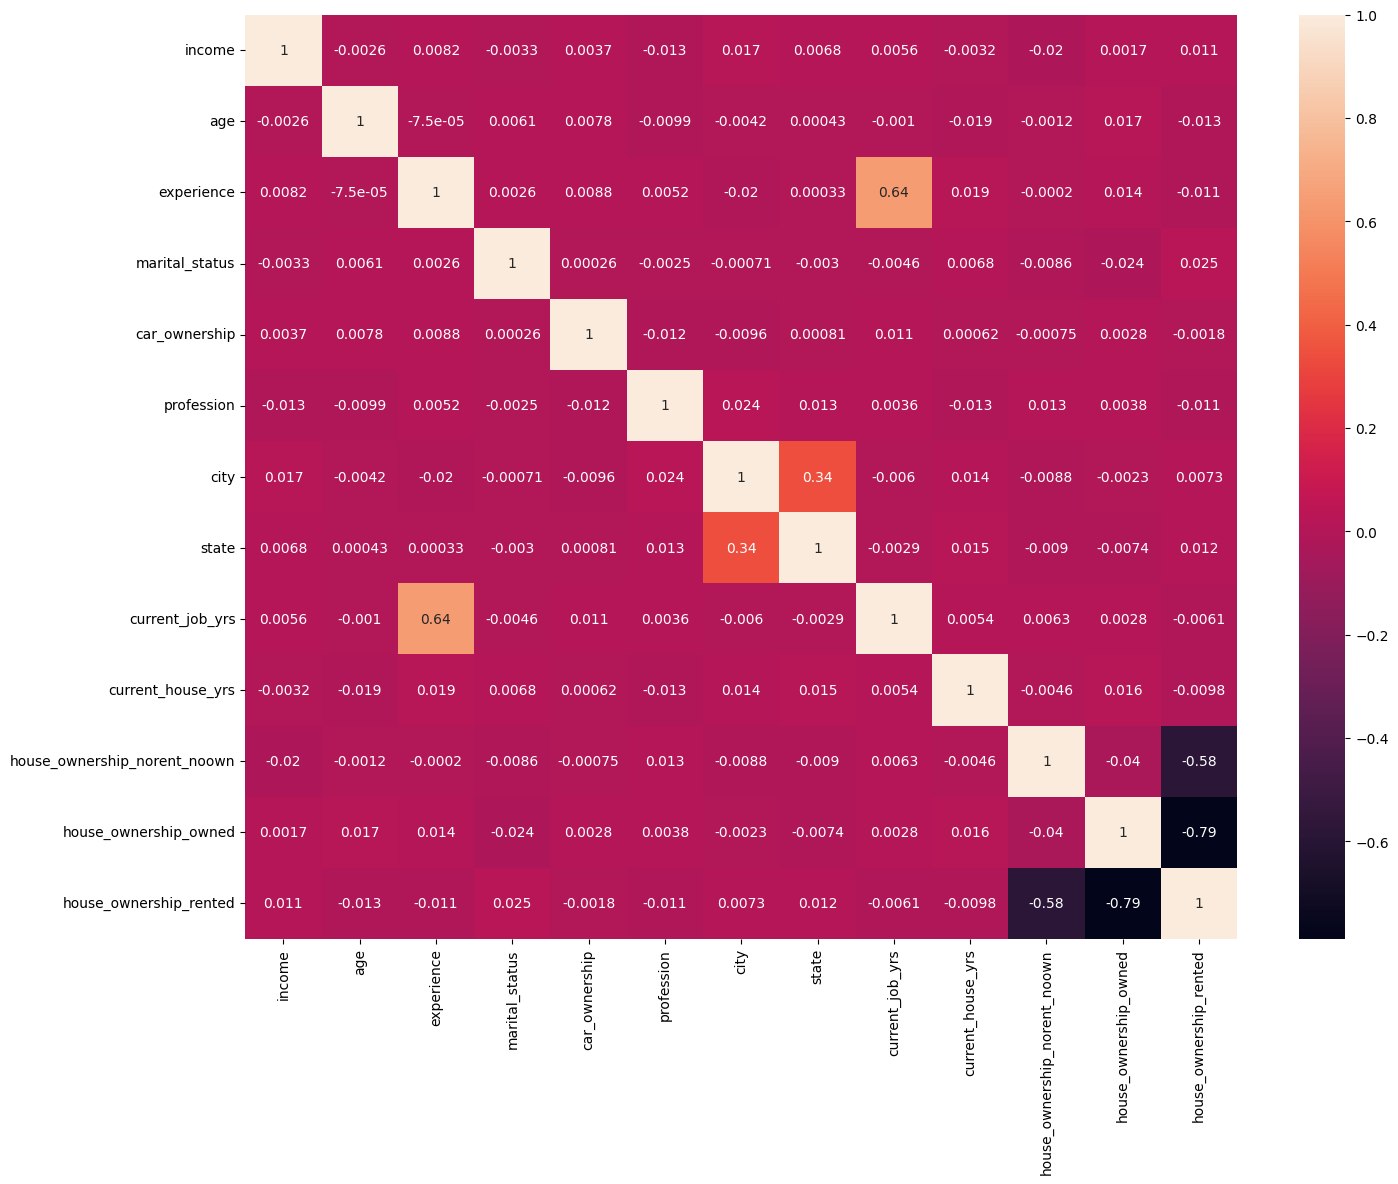

In [80]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train.corr(method='spearman'), annot=True)
plt.show()

In [81]:
#dropping columsn to increase the score and oversampling the data to fit the RF model 

cols_to_drop = ['current_job_yrs', 'city']

X_train_reduced = X_train.drop(cols_to_drop, axis=1)
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)

In [82]:
X_train_reduced.head()

,income,age,experience,marital_status,car_ownership,profession,state,current_house_yrs,house_ownership_norent_noown,house_ownership_owned,house_ownership_rented
200471,1.430422,1.170436,1.318759,0,0,0.120873,0.139313,-0.712569,0.0,0.0,1.0
92611,-0.820701,-0.644922,-1.680840,0,0,0.128980,0.103837,-0.712569,0.0,0.0,1.0
86397,-1.385148,-0.644922,-0.181041,0,0,0.131487,0.128364,0.717243,0.0,0.0,1.0
110500,-0.383000,-1.699001,-1.347551,0,0,0.129292,0.133547,0.002337,0.0,0.0,1.0
185133,1.551521,-0.527803,-0.847618,0,1,0.107390,0.101142,0.717243,1.0,0.0,0.0


In [83]:
model_2_rf = RandomForestClassifier(random_state=42)
model_2_rf.fit(X_train_os,y_train_os)

y_pred_os = model_2_rf.predict(X_test_os)
print_evaluation(y_test_os, y_pred_os)


Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     44147
           1       0.91      0.93      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294

Confusion Matrix
[[39957  4190]
 [ 3013 41134]]


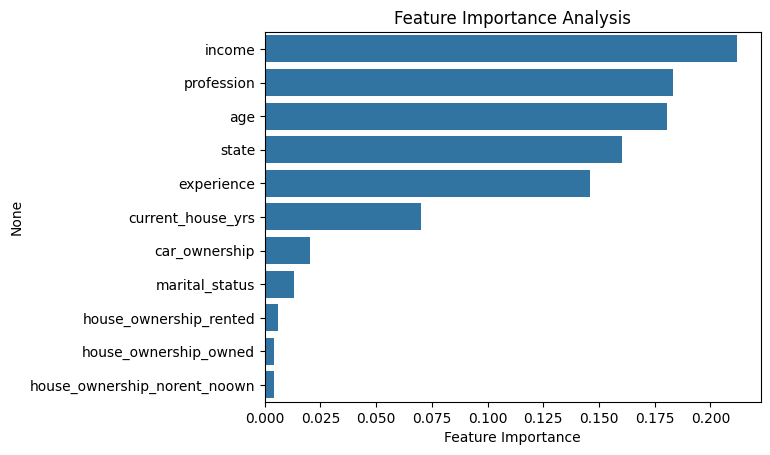

In [84]:
#Important features responsible for predicting 

feature_imp = pd.DataFrame(index = X_train_reduced.columns, 
                           data = model_2_rf.feature_importances_, 
                           columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)

ax = sns.barplot(x=feature_imp["Feature Importance"], y=feature_imp.index)
plt.title("Feature Importance Analysis")
plt.show()

In [85]:
#Dropping less important feature and fitting the balanced data to RF model 

cols_to_drop =  ['car_ownership', 'marital_status', 
                               'house_ownership_rented', 'house_ownership_owned', 
                               'house_ownership_norent_noown']


X_train_reduced = X_train.drop(cols_to_drop, axis=1)
X_test_reduced = X_test.drop(cols_to_drop, axis=1)

smote = SMOTE(random_state=42)
X_train_os, y_train_os = smote.fit_resample(X_train_reduced, y_train)
X_test_os, y_test_os = smote.fit_resample(X_test_reduced, y_test)

In [122]:
model_3_rf = RandomForestClassifier(random_state=100)
model_3_rf.fit(X_train_os,y_train_os)

y_pred_os = model_3_rf.predict(X_test_os)
#print_evaluation(y_test_os, y_pred_os)
print(classification_report(y_test_os,y_pred_os))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     44147
           1       0.90      0.94      0.92     44147

    accuracy                           0.92     88294
   macro avg       0.92      0.92      0.92     88294
weighted avg       0.92      0.92      0.92     88294



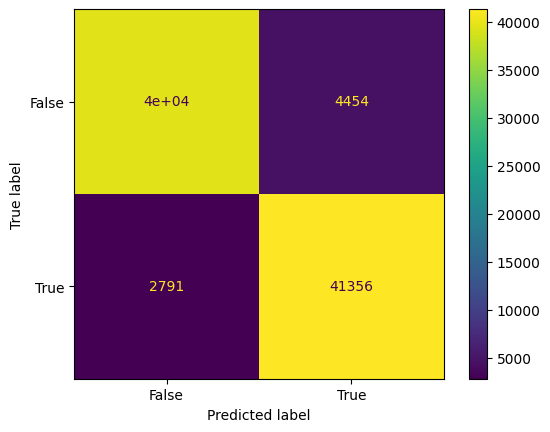

In [125]:
actual = y_test_os
predicted = y_pred_os

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [123]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

clf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, random_state=100)
from sklearn.metrics import accuracy_score, f1_score,classification_report
# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)

print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.88      1.00      0.94     44147
           1       0.71      0.08      0.14      6253

    accuracy                           0.88     50400
   macro avg       0.80      0.54      0.54     50400
weighted avg       0.86      0.88      0.84     50400



In [127]:
#Using grid search to tune the parameters to find out the best parameters for the random forest model 

param_grid = {
   'bootstrap': [True],
   'max_depth': [10, 20],
   'max_features': [None],
   'min_samples_split': [2, 10],
   'n_estimators': [100]
}

rfc = RandomForestClassifier()

clf = GridSearchCV(estimator = rfc, param_grid = param_grid, n_jobs = -1, verbose = 5)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print(clf.best_params_)
print(clf.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Accuracy:  0.8986111111111111
{'bootstrap': True, 'max_depth': 20, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier(max_depth=20, max_features=None)


Accuracy score: 0.8988293650793651
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     44147
           1       0.62      0.48      0.54      6253

    accuracy                           0.90     50400
   macro avg       0.77      0.72      0.74     50400
weighted avg       0.89      0.90      0.89     50400



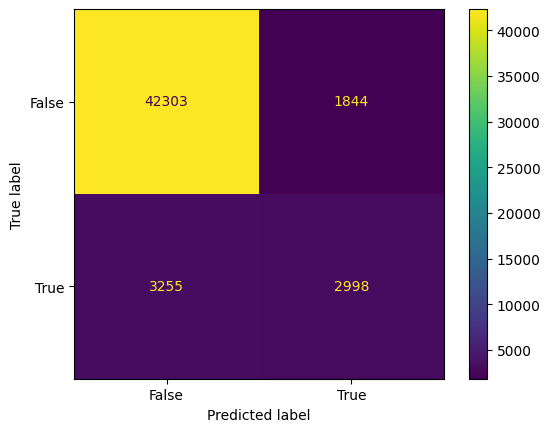

In [130]:
from sklearn.metrics import accuracy_score, f1_score,classification_report,recall_score,precision_score,f1_score
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', bootstrap = True, max_depth = 20, max_features = None, min_samples_split=2,n_estimators = 100, random_state=100)
# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)


print(f"Accuracy score: { accuracy_score(y_test, y_pred) }")
print(classification_report(y_test,y_pred))


actual = y_test
predicted = y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()